In [1]:
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

In [2]:
!ls ../data

india_admin_areas.geojson   nederland_pop_centres.gpkg	 sources
nederland_admin_areas.gpkg  nederland_pop_stats.feather


In [3]:
fiona.listlayers('../data/nederland_admin_areas.gpkg')

['gemeentegebied', 'landgebied', 'provinciegebied']

In [4]:
provinces = gpd.read_file('../data/nederland_admin_areas.gpkg', layer='provinciegebied')
provinces.head()

,identificatie,naam,code,ligt_in_land_code,ligt_in_land_naam,geometry
0,PV22,Drenthe,22,6030,Nederland,"MULTIPOLYGON (((231437.815 516445.643, 231430...."
1,PV24,Flevoland,24,6030,Nederland,"MULTIPOLYGON (((157694.139 473920.68, 159406.6..."
2,PV21,Fryslân,21,6030,Nederland,"MULTIPOLYGON (((189491.268 535832.617, 189494...."
3,PV25,Gelderland,25,6030,Nederland,"MULTIPOLYGON (((181361.527 418255.386, 181384...."
4,PV20,Groningen,20,6030,Nederland,"MULTIPOLYGON (((265275.541 549247.459, 265285...."


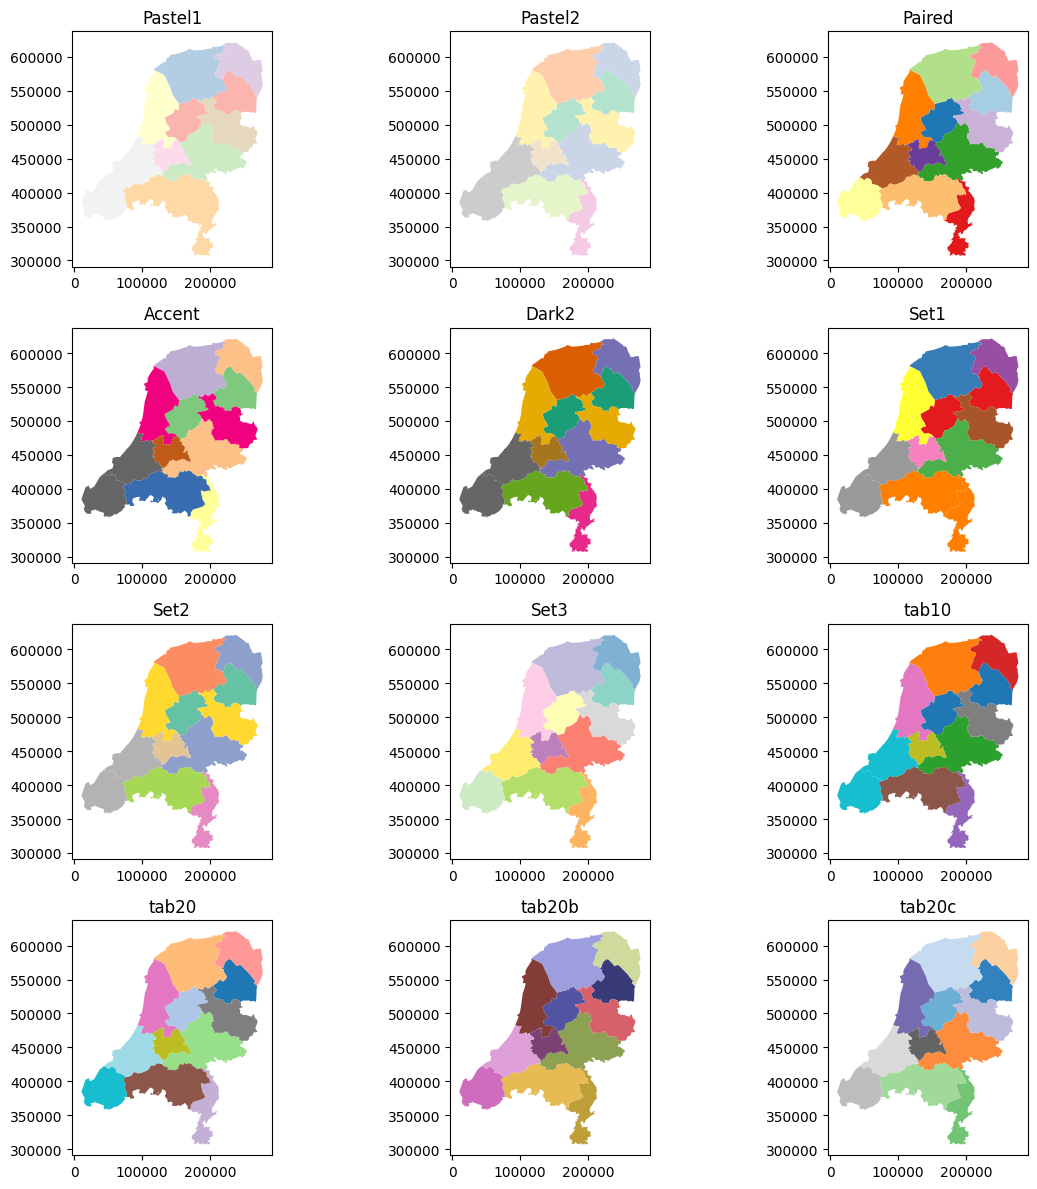

In [5]:
fig_1, axes_1 = plt.subplots(nrows=4, ncols=3, figsize=(12,12))
ax_1 = axes_1.flatten()

cmaps = ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1',
        'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']

# for i, v in enumerate(cmaps) 
for ax, cmap in zip(ax_1, cmaps):
    provinces.plot(ax=ax, cmap=cmap)
    ax.set_title(cmap)

plt.tight_layout()
plt.show()

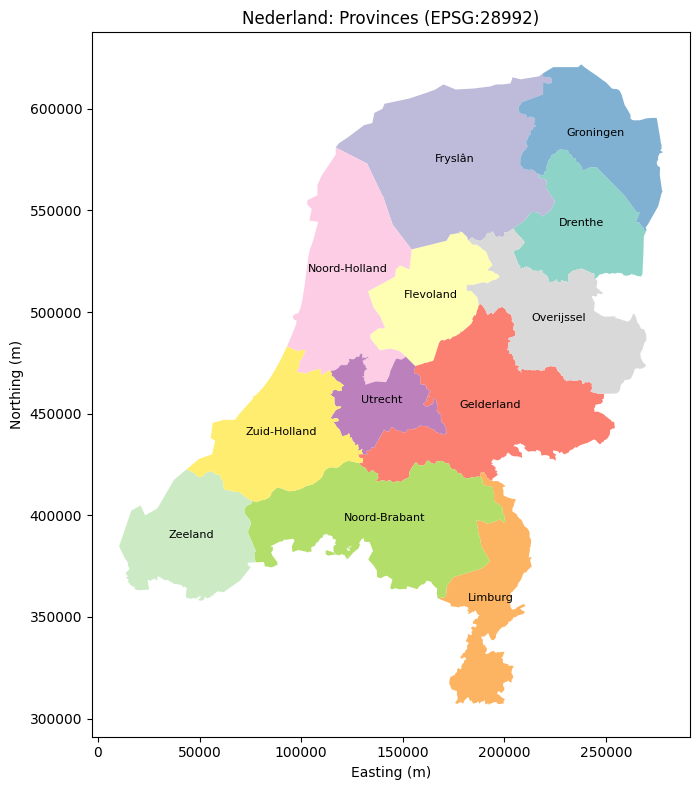

In [6]:
fig_2, ax_2 = plt.subplots(figsize=(10,8))
provinces.plot(ax=ax_2, categorical=True, cmap='Set3')

for row in provinces.itertuples():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    label = row.naam
    ax_2.annotate(label, xy=(x,y), fontsize=8, ha='center')
    

ax_2.set_title('Nederland: Provinces (EPSG:28992)')
ax_2.set_xlabel('Easting (m)')
ax_2.set_ylabel('Northing (m)')

plt.tight_layout()
plt.show()

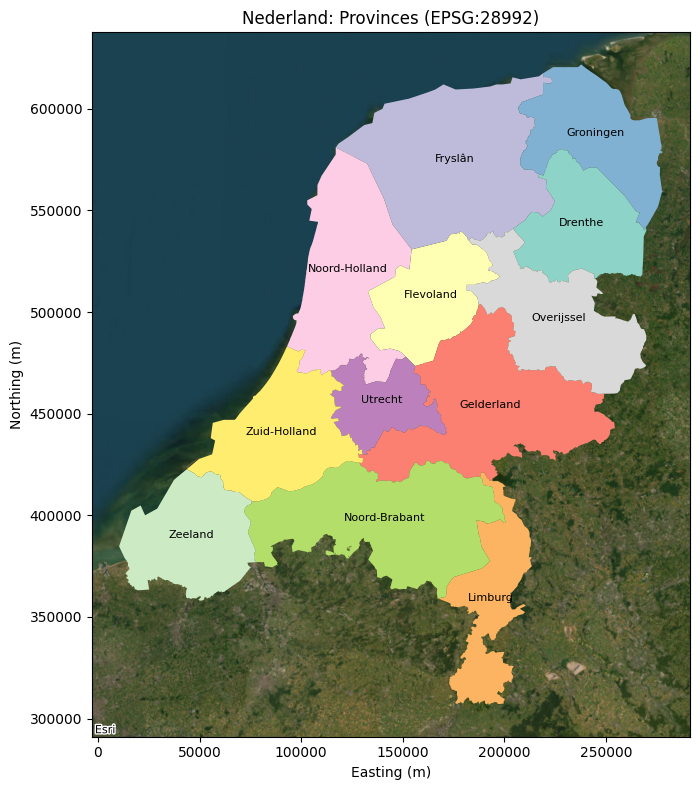

In [7]:
fig_3, ax_3 = plt.subplots(figsize=(10,8))
provinces.plot(ax=ax_3, cmap='Set3')

basemap = cx.providers.Esri.WorldImagery.copy()
basemap['attribution'] = 'Esri'
cx.add_basemap(ax_3, crs=provinces.crs, source=basemap)

for row in provinces.itertuples():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    label = row.naam
    ax_3.annotate(label, xy=(x,y), fontsize=8, ha='center')

ax_3.set_title('Nederland: Provinces (EPSG:28992)')
ax_3.set_xlabel('Easting (m)')
ax_3.set_ylabel('Northing (m)')

plt.tight_layout()
plt.show()